In [14]:
import tensorflow as tf
print(tf.__version__)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pylab as plt
from livelossplot import PlotLossesKeras


2.13.1


In [15]:
# loading csv dataset for manipulator
df = pd.read_csv("manipulator_dataset.csv", index_col=False)
df

,x,y,q1,q2
0,2.000000,0.000000e+00,0.0,0.000000
1,1.997945,6.407022e-02,0.0,3.673469
2,1.991790,1.278772e-01,0.0,7.346939
3,1.981559,1.911586e-01,0.0,11.020408
4,1.967295,2.536546e-01,0.0,14.693878
...,...,...,...,...
2495,-0.032705,-2.536546e-01,180.0,165.306122
2496,-0.018441,-1.911586e-01,180.0,168.979592
2497,-0.008210,-1.278772e-01,180.0,172.653061
2498,-0.002055,-6.407022e-02,180.0,176.326531


In [16]:
# creating data and label dataframes and 

features = df.copy()
features.pop("q1")
features.pop("q2")
labels = df.copy()
labels.pop("x")
labels.pop("y")

features = np.array(features)
labels = np.array(labels)
print(features)
print(labels)

[[ 2.00000000e+00  0.00000000e+00]
 [ 1.99794539e+00  6.40702200e-02]
 [ 1.99179001e+00  1.27877162e-01]
 ...
 [-8.20998618e-03 -1.27877162e-01]
 [-2.05460725e-03 -6.40702200e-02]
 [ 0.00000000e+00 -1.22464680e-16]]
[[  0.           0.        ]
 [  0.           3.67346939]
 [  0.           7.34693878]
 ...
 [180.         172.65306122]
 [180.         176.32653061]
 [180.         180.        ]]


In [17]:
# clean, normalize, and split data
feat_mean = np.mean(features, axis=0)
feat_std = np.std(features, axis=0)
lab_mean = np.mean(labels, axis=0)
lab_std = np.std(labels, axis=0)

print(features)
print(labels)

train_data, test_data, train_targets, test_targets = train_test_split(features, labels, test_size=0.2)
print(train_targets)

[[ 2.00000000e+00  0.00000000e+00]
 [ 1.99794539e+00  6.40702200e-02]
 [ 1.99179001e+00  1.27877162e-01]
 ...
 [-8.20998618e-03 -1.27877162e-01]
 [-2.05460725e-03 -6.40702200e-02]
 [ 0.00000000e+00 -1.22464680e-16]]
[[  0.           0.        ]
 [  0.           3.67346939]
 [  0.           7.34693878]
 ...
 [180.         172.65306122]
 [180.         176.32653061]
 [180.         180.        ]]
[[ 33.06122449 168.97959184]
 [  3.67346939 176.32653061]
 [ 36.73469388  51.42857143]
 ...
 [161.63265306  66.12244898]
 [150.6122449   69.79591837]
 [157.95918367 146.93877551]]


In [18]:
test_data[5].shape
(train_data.shape[1],)

(2,)

In [19]:
# build the model
def get_model(wd, rate):

    model = Sequential([
        Dense(512, kernel_regularizer = regularizers.l1_l2(wd, wd), activation = 'relu', input_shape = (train_data.shape[1],)),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd), activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(512, kernel_regularizer = regularizers.l2(wd)),
        Dense(train_targets.shape[1])
    ])
    return model

model = get_model(1e-3, 0.2)

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 512)               1536      
                                                                 
 dense_46 (Dense)            (None, 512)               262656    
                                                                 
 dense_47 (Dense)            (None, 512)               262656    
                                                                 
 dense_48 (Dense)            (None, 512)               262656    
                                                                 
 dense_49 (Dense)            (None, 512)               262656    
                                                                 
 dense_50 (Dense)            (None, 512)               262656    
                                                                 
 dense_51 (Dense)            (None, 512)              

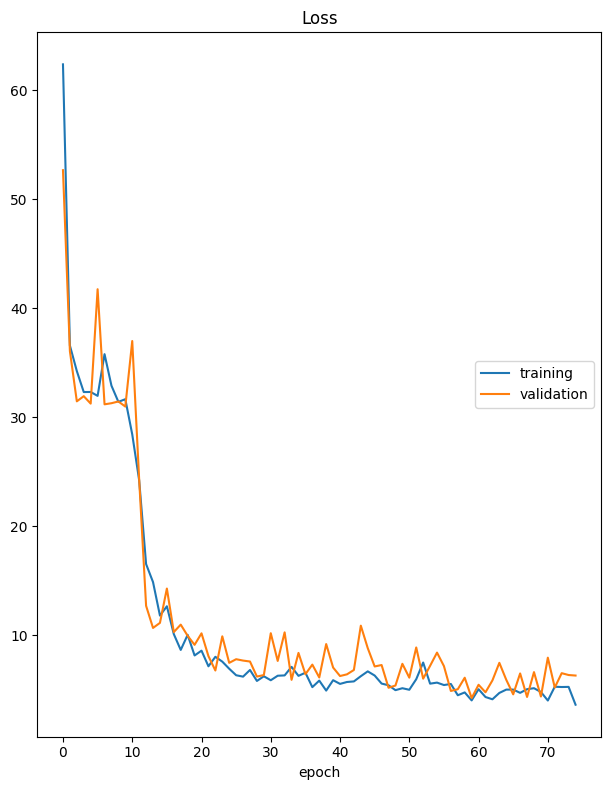

Loss
	training         	 (min:    3.607, max:   62.354, cur:    3.607)
	validation       	 (min:    4.220, max:   52.644, cur:    6.282)
54/54 [==============================] - 2s 31ms/step - loss: 3.6075 - val_loss: 6.2823


In [20]:
# Define the early stopping object
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=15, mode='min')

# Compile the model
model.compile(optimizer='adam', loss='mae')

# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, batch_size=32, validation_split=0.15, verbose=True, callbacks=[early_stopping, PlotLossesKeras()])

In [21]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

16/16 - 0s - loss: 5.9085 - 75ms/epoch - 5ms/step


5.908527851104736

In [23]:
print(model.predict([[0,2],[2,0],[1,1],[1.4,1.3],[-1,-1]]))

1/1 [==============================] - 0s 28ms/step
[[ 82.52112    10.429477 ]
 [  2.714726    6.4013457]
 [  0.9894364  94.17665  ]
 [ 37.357098   17.726227 ]
 [178.28905    99.67123  ]]


In [25]:
model.save("invkine_model.h5")

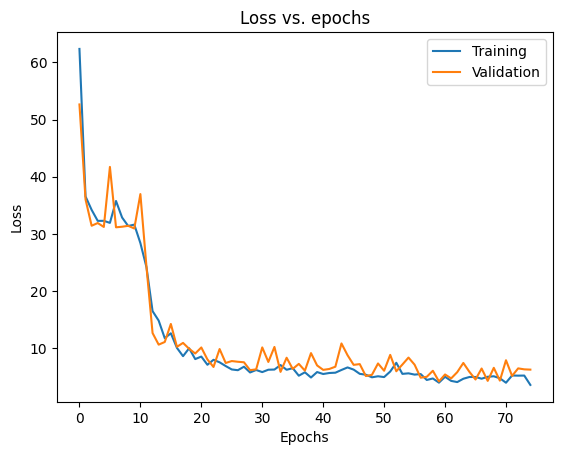

In [26]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [28]:
new_model = tf.keras.models.load_model('invkine_model.h5')

In [29]:
new_model.predict([[0,2],[2,0],[1,1],[1.4,1.3],[0,0],[0,-2]])

1/1 [==============================] - 0s 169ms/step


array([[ 82.52112  ,  10.429477 ],
       [  2.714726 ,   6.4013457],
       [  0.9894364,  94.17665  ],
       [ 37.357098 ,  17.726227 ],
       [ 70.11199  , 182.49486  ],
       [273.69986  , 108.646324 ]], dtype=float32)

In [36]:
print(new_model.predict([[0,2]])[0])

1/1 [==============================] - 0s 36ms/step
82.52113
